# 2. 数据统计与划分测试集与训练集
## 2.1将label保存成numpy非one-hot格式

| 名称 | 像素 | 类别 |
| -- | -- | -- |
|水    田 | R:0, G:200, B:0 | 1 |
|水 浇 地 | R:150, G:250, B:0 | 2 |
|旱 耕 地 | R:150, G:200, B:150 | 3 |
|园    地 | R:200, G:0, B:200 | 4 |
|乔木林地 | R:150, G:0, B:250 | 5 |
|灌木林地 | R:150, G:150, B:250 | 6 |
|天然草地 | R:250, G:200, B:0 | 7 |
|人工草地 | R:200, G:200, B:0 | 8 |
|工业用地 | R:200, G:0, B:0 | 9 |
|城市住宅 | R:250, G:0, B:150 | 10 |
|村镇住宅 | R:200, G:150, B:150 | 11 |
|交通运输 | R:250, G:150, B:150 | 12 |
|河    流 | R:0, G:0, B:200 | 13 |
|湖    泊 | R:0, G:150, B:200 | 14|
|坑    塘 | R:0, G:200, B:250 | 15 |
|其他类别 | R:0, G:0, B:0 | 0|

In [1]:
import os
import gc
import cv2
import random
import numpy as np

from libtiff import TIFF
from tqdm import tqdm

In [3]:
filelist = os.listdir('../data/all_1031/')
print(filelist)

['20150212_L1A0000647768_1.npy', '20150212_L1A0000647768_1_label.npy', '20150212_L1A0000647768_2.npy', '20150212_L1A0000647768_2_label.npy', '20150212_L1A0000647768_3.npy', '20150212_L1A0000647768_3_label.npy', '20150212_L1A0000647768_4.npy', '20150212_L1A0000647768_4_label.npy', '20150217_L1A0000658637_1.npy', '20150217_L1A0000658637_1_label.npy', '20150217_L1A0000658637_2.npy', '20150217_L1A0000658637_2_label.npy', '20150217_L1A0000658637_3.npy', '20150217_L1A0000658637_3_label.npy', '20150217_L1A0000658637_4.npy', '20150217_L1A0000658637_4_label.npy', '20150902_L1A0001015649_1.npy', '20150902_L1A0001015649_1_label.npy', '20150902_L1A0001015649_2.npy', '20150902_L1A0001015649_2_label.npy', '20150902_L1A0001015649_3.npy', '20150902_L1A0001015649_4.npy', '20150902_L1A0001015649_4_label.npy', '20151203_L1A0001217916_1.npy', '20151203_L1A0001217916_1_label.npy', '20151203_L1A0001217916_2.npy', '20151203_L1A0001217916_2_label.npy', '20151203_L1A0001217916_3.npy', '20151203_L1A0001217916_3

In [4]:
CLS = {'[0, 0, 0]' : 0,
       '[0, 200, 0]' : 1,
       '[150, 250, 0]' : 2,
       '[150, 200, 150]' : 3,
       '[200, 0, 200]' : 4,
       '[150, 0, 250]' : 5,
       '[150, 150, 250]' : 6,
       '[250, 200, 0]' : 7,
       '[200, 200, 0]' : 8,
       '[200, 0, 0]' : 9,
       '[250, 0, 150]' : 10,
       '[200, 150, 150]' : 11,
       '[250, 150, 150]' : 12,
       '[0, 0, 200]' : 13,
       '[0, 150, 200]' : 14,
       '[0, 200, 250]' : 15}

In [21]:
all_count_list = []  # 记录全局类别数量
for file in filelist:
    if file.split('_')[-1] == 'label.npy':
        print('Read... {}'.format(file))
        npy = np.load('../data/all_1031/'+file)
        shape = npy.shape
        label = np.zeros((shape[0],shape[1]),dtype=np.uint8)
        count_list = np.zeros((16,))    # 记录单张图的类别数量
        for i in range(shape[0]):
            for j in range(shape[1]):
                label[i][j] = CLS['{}'.format(list(npy[i][j]))]   # 通过字典形式快速索引类别编号
            count_list += np.bincount(label[i], minlength=16)
        all_count_list.append(count_list)
        print("{}:{}\n".format(label.shape, count_list))
        np.save('../data/all_1031/'+ os.path.splitext(file)[0]+'_clsindex.npy', label)

Read... 20150212_L1A0000647768_1_label.npy
(3400, 3600):[5793809.       0. 3493699.       0.       0. 1030766.       0.       0.
       0.    9011.   10065.  531391.       0.  567533.  733835.   69891.]

Read... 20150212_L1A0000647768_2_label.npy
(3400, 3600):[6.439561e+06 0.000000e+00 3.247676e+06 0.000000e+00 0.000000e+00
 5.730300e+05 0.000000e+00 0.000000e+00 0.000000e+00 2.998350e+05
 1.932540e+05 2.991700e+05 5.484100e+04 0.000000e+00 1.132632e+06
 1.000000e+00]

Read... 20150212_L1A0000647768_3_label.npy
(3400, 3600):[3051755.       0. 7738840.       0.  725261.   90739.       0.       0.
       0.    8147.  136665.  378256.       0.       0.       0.  110337.]

Read... 20150212_L1A0000647768_4_label.npy
(3400, 3600):[5832807.       0. 3784821.       0.   21994.  364412.       0.       0.
       0.  203454.   83906.  324494.       0.   70726. 1337199.  216187.]

Read... 20150217_L1A0000658637_1_label.npy
(3400, 3600):[3.105225e+06 5.403259e+06 2.879217e+06 0.000000e+00 0.000000e

(3400, 3600):[ 2055585.        0.        0. 10046098.   100609.        0.        0.
        0.        0.        0.        0.    37708.        0.        0.
        0.        0.]



In [25]:
print(np.sum(all_count_list, axis=0))

[2.08907408e+08 1.91377240e+07 7.76964010e+07 5.50720910e+07
 4.73315300e+06 4.29657700e+06 1.20748300e+06 1.30446680e+07
 2.28715800e+06 7.90587100e+06 6.32977920e+07 8.50842200e+06
 4.45610200e+06 7.53353400e+06 7.38763900e+06 4.12797700e+06]


## 2.2 可视化全部文件的各类别数量

In [2]:
from matplotlib import pyplot as plt
import shutil
%matplotlib inline

### 2.2.1 包含背景(black)类别的数量统计

[2.08907408e+08 1.91377240e+07 7.76964010e+07 5.50720910e+07
 4.73315300e+06 4.29657700e+06 1.20748300e+06 1.30446680e+07
 2.28715800e+06 7.90587100e+06 6.32977920e+07 8.50842200e+06
 4.45610200e+06 7.53353400e+06 7.38763900e+06 4.12797700e+06]


<BarContainer object of 16 artists>

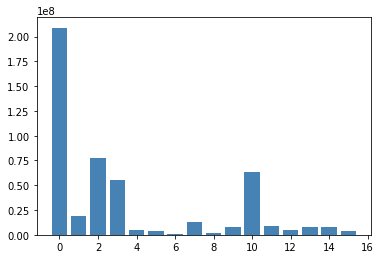

In [40]:
cls_num = np.sum(all_count_list, axis=0)
cls_list = np.arange(0,16)
print(cls_num)
plt.bar(x=cls_list, height=cls_num, label='各类别数量', color='steelblue')

### 2.2.2 无背景类别的数量统计

<BarContainer object of 15 artists>

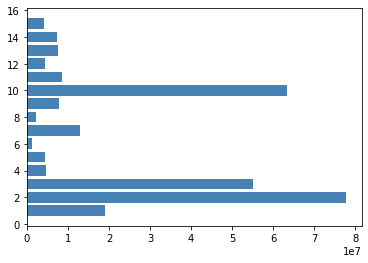

In [42]:
plt.barh(y=cls_list[1:], width=cls_num[1:], label='除其他类外数量', color='steelblue')

## 2.3  分析单张1/4图片的类别分布，以平衡test与train的各类别
* 需要手动拷贝到../data/test/文件夹中

In [55]:
for i in range(len(all_count_list)//4):
    count_list_4 = all_count_list[4*i:4*i+4]
    dif = []
    for index,tmp in enumerate(count_list_4):
        avg_list = (np.sum(count_list_4, axis=0)-tmp)/3
        dif.append(np.sum(abs(avg_list[1:]-tmp[1:])))    
    print(dif)
    test_filename = (filelist[(4*i+index)*2].split('_')[0]+'_'+filelist[(4*i+index)*2].split('_')[1]
                     +'_'+str(dif.index(min(dif))))
    print('Copy test file {}\n'.format(test_filename))

[3544596.666666666, 3381822.000000001, 7037572.666666666, 2675652.6666666665]
Copy test file 20150212_L1A0000647768_3

[8619726.000000002, 4929934.0, 8760761.333333332, 5491691.333333333]
Copy test file 20150217_L1A0000658637_1

[7550292.666666668, 5262068.0, 6834143.333333334, 16346332.666666666]
Copy test file 20150902_L1A0001015649_1

[4994076.666666667, 5675398.000000001, 7752722.0, 16013561.333333334]
Copy test file 20151203_L1A0001217916_0

[4638177.666666666, 3878882.3333333335, 3809245.0000000005, 9796941.000000002]
Copy test file 20160225_L1A0001433318_2

[10224586.333333334, 4618827.666666666, 6369607.000000001, 5653755.666666666]
Copy test file 20160421_L1A0001537716_1

[7404305.000000001, 5829087.666666666, 5962893.000000001, 5983825.000000001]
Copy test file 20160510_L1A0001573999_1

[8545557.666666666, 6872852.333333333, 7686969.666666666, 7987865.0]
Copy test file 20160816_L1A0001765570_1

[13873682.666666666, 5576931.333333333, 6482731.999999999, 11498021.999999998]
Cop

## 2.4 分析test与train的类别分布
### 2.4.1 train

In [3]:
all_count_list = []  # 记录全局类别数量
filelist = os.listdir('../data/train_1106/')
for file in filelist:
    if file.split('_')[-1] == 'clsindex.npy':
        print('Read... {}'.format(file))
        npy = np.load('../data/train_1106/'+file)
        shape = npy.shape
        count_list = np.zeros((16,))    # 记录单张图的类别数量
        for i in range(shape[0]):
            count_list += np.bincount(npy[i], minlength=16)
        all_count_list.append(count_list)
        print("{}:{}\n".format(npy.shape, count_list))

Read... 20150212_L1A0000647768_1_label_onehot.npy
(3400, 3600):[5793809.       0. 3493699.       0.       0. 1030766.       0.       0.
       0.    9011.   10065.  531391.       0.  567533.  733835.   69891.]

Read... 20150212_L1A0000647768_2_label_onehot.npy
(3400, 3600):[6.439561e+06 0.000000e+00 3.247676e+06 0.000000e+00 0.000000e+00
 5.730300e+05 0.000000e+00 0.000000e+00 0.000000e+00 2.998350e+05
 1.932540e+05 2.991700e+05 5.484100e+04 0.000000e+00 1.132632e+06
 1.000000e+00]

Read... 20150212_L1A0000647768_3_label_onehot.npy
(3400, 3600):[3051755.       0. 7738840.       0.  725261.   90739.       0.       0.
       0.    8147.  136665.  378256.       0.       0.       0.  110337.]

Read... 20150217_L1A0000658637_1_label_onehot.npy
(3400, 3600):[3.105225e+06 5.403259e+06 2.879217e+06 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 2.652300e+04
 3.855180e+05 2.708700e+04 2.883000e+03 1.808450e+05 0.000000e+00
 2.294430e+05]

Read... 20151203_L1A0001

<BarContainer object of 16 artists>

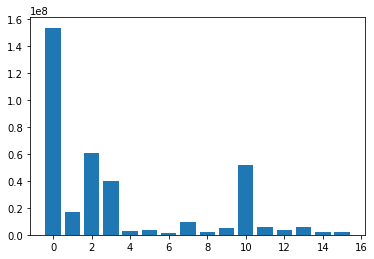

In [4]:
cls_num = np.sum(all_count_list, axis = 0)
cls_list =np.arange(16)
plt.bar(x=cls_list, height=cls_num)

<BarContainer object of 15 artists>

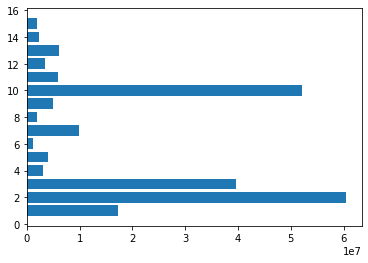

In [5]:
plt.barh(y=cls_list[1:], width=cls_num[1:])

In [9]:
print("train各类别数量: \n{}".format(cls_num/min(cls_num)))

train各类别数量: 
[141.97458171  15.89061026  55.83793117  36.63676005   2.7721188
   3.63344831   1.           9.1034593    1.75252746   4.48767664
  48.09200037   5.41771721   3.11977587   5.64124715   2.12681053
   1.81807463]


### 2.4.2 test

In [7]:
all_count_list = []  # 记录全局类别数量
filelist = os.listdir('../data/test_1106/')
for file in filelist:
    if file.split('_')[-1] == 'onehot.npy':
        print('Read... {}'.format(file))
        npy = np.load('../data/test_1106/'+file)
        shape = npy.shape
        count_list = np.zeros((16,))    # 记录单张图的类别数量
        for i in range(shape[0]):
            count_list += np.bincount(npy[i], minlength=16)
        all_count_list.append(count_list)
        print("{}:{}\n".format(npy.shape, count_list))

Read... 20150212_L1A0000647768_4_label_onehot.npy
(3400, 3600):[5832807.       0. 3784821.       0.   21994.  364412.       0.       0.
       0.  203454.   83906.  324494.       0.   70726. 1337199.  216187.]

Read... 20150217_L1A0000658637_2_label_onehot.npy
(3400, 3600):[5172528.  102376. 4037489.       0.       0.       0.       0.       0.
       0.  698041.  817892.  322980.   95881.  762613.       0.  230200.]

Read... 20150902_L1A0001015649_2_label_onehot.npy
(3400, 3600):[3889069. 1838323. 4916383.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.   85519.       0. 1510706.]

Read... 20151203_L1A0001217916_1_label_onehot.npy
(3400, 3600):[5246250.       0.       0.  339502.       0.       0.       0.       0.
       0. 1386890. 4549820.       0.  590390.  127148.       0.       0.]

Read... 20160225_L1A0001433318_3_label_onehot.npy
(3400, 3600):[6732524.       0. 4529173.       0.  869415.       0.       0.  108888.
       0.       0.  

In [11]:
cls_num = np.sum(all_count_list, axis = 0)

In [12]:
print("test各类别数量: \n{}".format(cls_num/min(cls_num)))       

test各类别数量: 
[441.13251377  15.492129   137.84518241 123.12056358  13.83515606
   2.90901253   1.          25.48723557   3.11766584  24.34141454
  89.82201644  21.11677177   8.62010058  11.40339267  40.60011974
  17.24621218]


## 2.5 按五类统计

| 名称 | 包含15类别 | 5类别编号 |
| -- | -- | -- |
|未知类别 | 0 | 0|
|耕地 | 1, 2, 3 | 1 |
|林地 | 4, 5, 6 | 2 |
|草地 | 7, 8 | 3 |
|建设用地 | 9, 10, 11, 12 | 4 |
|水系 | 13, 14, 15 | 5 |

In [ ]:
all_count_list = []  # 记录全局类别数量
filelist = os.listdir('../data/train_1106/')
for file in filelist:
    if file.split('_')[-1] == 'clsindex.npy':
        print('Read... {}'.format(file))
        npy = np.load('../data/train_1106/'+file)
        shape = npy.shape
        count_list = np.zeros((16,))    # 记录单张图的类别数量
         
            count_list += np.bincount(npy[i], minlength=16)
        all_count_list.append(count_list)
        print("{}:{}\n".format(npy.shape, count_list))